In [1]:
import numpy  as np
import pandas as pd
USAhaousing = pd.read_csv("C:\\Users\\HP EliteBook 850 G3\\Desktop\\COUR S2\\machainne_learning\\USA_Housing.csv")
USAhaousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
USAhaousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [3]:
X=USAhaousing[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
Y=USAhaousing['Price']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Avec un pipeline, vous structurez les différentes étapes de transformation dans un seul objet.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [6]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

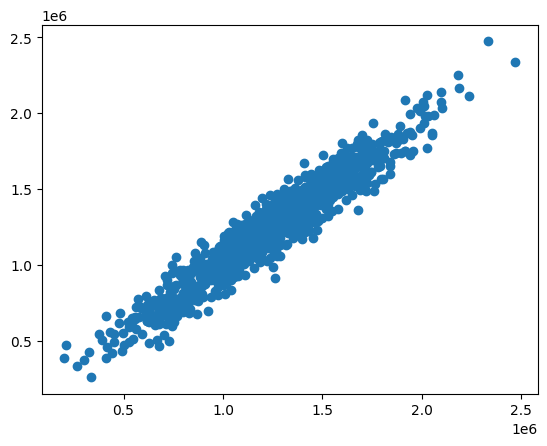

In [8]:
import matplotlib.pyplot as plt
pred = lin_reg.predict(X_test)
plt.scatter(Y_test,pred)


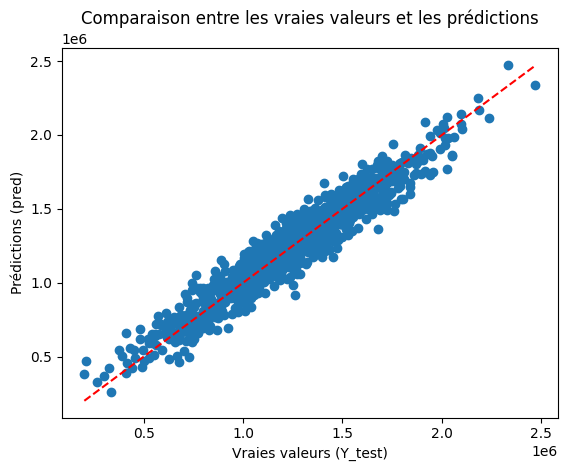

In [9]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, pred)
plt.title('Comparaison entre les vraies valeurs et les prédictions')
plt.xlabel('Vraies valeurs (Y_test)')
plt.ylabel('Prédictions (pred)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Ligne idéale
plt.show()


In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square', r2_square)
    print('---------------------------------------')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, mape, r2_square


In [11]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print("Test evaluation :\n_________________")
print_evaluate(Y_test,test_pred)
print("traine et evaluation:\n_________________")
print_evaluate(Y_train,train_pred)

Test evaluation :
_________________
MAE: 80879.09722219854
MSE: 10089009299.501547
RMSE: 100444.06054865339
MAPE: 7.387838858863096
R2 Square 0.9179971706985147
---------------------------------------
traine et evaluation:
_________________
MAE: 81509.3933109769
MSE: 10256318867.560856
RMSE: 101273.48551106975
MAPE: 7.682929605069338
R2 Square 0.9179787435623465
---------------------------------------


In [12]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [13]:
import pickle

# Assurez-vous que lin_reg (votre modèle) est entraîné
with open('model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)


In [14]:
import numpy as np
import pickle
from ipywidgets import FloatText, Button, Output, VBox, Layout
from IPython.display import display, HTML

# Charger le modèle sauvegardé
try:
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    display(HTML("<h3 style='color: red;'>Erreur : Le fichier <code>model.pkl</code> est introuvable. Veuillez vérifier son chemin.</h3>"))
    raise

# Créer les champs de saisie pour les caractéristiques
income_input = FloatText(value=50000, description="Revenu Moyen :",
                         style={'description_width': '150px'}, layout=Layout(width='400px'))
house_age_input = FloatText(value=5, description="Âge des Maisons :",
                            style={'description_width': '150px'}, layout=Layout(width='400px'))
rooms_input = FloatText(value=6, description="Nombre de Pièces :",
                        style={'description_width': '150px'}, layout=Layout(width='400px'))
bedrooms_input = FloatText(value=3, description="Nombre de Chambres :",
                           style={'description_width': '150px'}, layout=Layout(width='400px'))
population_input = FloatText(value=1000, description="Population :",
                             style={'description_width': '150px'}, layout=Layout(width='400px'))

# Bouton pour prédire
predict_button = Button(description="Prédire", button_style='success', 
                        layout=Layout(width='200px', margin='10px 0'),
                        style={'font_weight': 'bold', 'font_size': '16px'})

# Zone de sortie pour afficher le résultat
output = Output()

# Fonction pour effectuer la prédiction
def make_prediction(_):
    output.clear_output()
    try:
        # Récupérer les valeurs saisies
        income = income_input.value
        house_age = house_age_input.value
        rooms = rooms_input.value
        bedrooms = bedrooms_input.value
        population = population_input.value

        # Préparer les données pour le modèle
        features = np.array([[income, house_age, rooms, bedrooms, population]])
        
        # Faire une prédiction
        prediction = model.predict(features)

        # Afficher le résultat
        with output:
            display(HTML(f"<h3 style='color: green;'>Prix prédit : <strong>${prediction[0]:,.2f}</strong></h3>"))
    except Exception as e:
        with output:
            display(HTML(f"<h3 style='color: red;'>Erreur : {e}</h3>"))

# Associer le bouton à la fonction de prédiction
predict_button.on_click(make_prediction)

# Ajouter du style à l'interface avec HTML et CSS
display(HTML("""
<style>
    .custom-interface {
        font-family: Arial, sans-serif;
        background-color: #f9f9f9;
        border: 2px solid #ddd;
        border-radius: 10px;
        padding: 20px;
        margin-top: 20px;
        box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
        width: 50%;
    }
    .custom-header {
        color: #444;
        text-align: center;
        margin-bottom: 20px;
    }
    .custom-button {
        background-color: #28a745 !important;
        color: white;
        font-weight: bold;
        border-radius: 5px;
        padding: 10px;
        text-align: center;
        cursor: pointer;
    }
</style>
<div class='custom-interface'>
    <h2 class='custom-header'>Prédiction de Prix de Maison</h2>
</div>
"""))

# Interface utilisateur
interface = VBox([
    income_input,
    house_age_input,
    rooms_input,
    bedrooms_input,
    population_input,
    predict_button,
    output
], layout=Layout(padding="20px", background_color="#ffffff", border="1px solid #ccc", border_radius="10px"))

# Afficher l'interface
interface
